In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [68]:
print("Taille du dataset d'entraînement :", x_train.shape)
print("Taille du dataset de test :", x_test.shape)
print("Nombre d'images d'entraînement :", len(x_train))
print("Nombre d'images de test :", len(x_test))
num_classes = len(set(y_train.flatten()))
print("Nombre de classes :", num_classes)
#print("Labels d'entraînement :", y_train[:10])
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding des étiquettes
num_classes = 10  
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 4. Construisez un réseau de neurones dense
model = models.Sequential()

# Ajoutez une couche d'aplatissement pour convertir les images en vecteurs
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# Ajoutez une couche dense avec 128 neurones et une fonction d'activation ReLU
model.add(layers.Dense(128, activation='relu'))

# Ajoutez une couche de sortie avec le nombre de neurones égal au nombre de classes
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Taille du dataset d'entraînement : (50000, 32, 32, 3)
Taille du dataset de test : (10000, 32, 32, 3)
Nombre d'images d'entraînement : 50000
Nombre d'images de test : 10000
Nombre de classes : 10
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_46 (Flatten)        (None, 3072)              0         
                                                                 
 dense_92 (Dense)            (None, 128)               393344    
                                                                 
 dense_93 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# 4. Construisez un réseau de neurones convolutionnel (CNN)
model = models.Sequential()

# Ajoutez une couche de convolution avec 32 filtres et une fenêtre de 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Ajoutez une couche de pooling pour réduire la dimension spatiale
model.add(layers.MaxPooling2D((2, 2)))

# Ajoutez une deuxième couche de convolution avec 64 filtres et une fenêtre de 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajoutez une deuxième couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Ajoutez une troisième couche de convolution avec 64 filtres et une fenêtre de 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajoutez une couche d'aplatissement pour convertir les images en vecteurs
model.add(layers.Flatten())

# Ajoutez une couche dense avec 64 neurones et une fonction d'activation ReLU
model.add(layers.Dense(64, activation='relu'))

# Ajoutez une couche de sortie avec le nombre de neurones égal au nombre de classes
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_47 (Flatten)        (None, 1024)            

In [70]:
# 5. Compilez le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Entraînez le modèle sur les données d'entraînement
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

# 7. Évaluez les performances du modèle sur les données de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nPrécision sur les données de test :", test_acc)

# 8. Comparez les performances avec le modèle précédent
dense_model = models.Sequential()
dense_model.add(layers.Flatten(input_shape=(32, 32, 3)))
dense_model.add(layers.Dense(128, activation='relu'))
dense_model.add(layers.Dense(num_classes, activation='softmax'))
dense_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test, verbose=2)
print("\nPrécision du modèle dense sur les données de test :", dense_test_acc)


Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4858 - accuracy: 0.4581 - val_loss: 1.1969 - val_accuracy: 0.5768
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1331 - accuracy: 0.5983 - val_loss: 1.0816 - val_accuracy: 0.6205
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9796 - accuracy: 0.6539 - val_loss: 0.9438 - val_accuracy: 0.6696
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8714 - accuracy: 0.6941 - val_loss: 0.9239 - val_accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8003 - accuracy: 0.7207 - val_loss: 0.8976 - val_accuracy: 0.6945
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7347 - accuracy: 0.7438 - val_loss: 0.8857 - val_accuracy: 0.6979
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6875 - accuracy: 0.7592 - val_loss: 0.9153 - val_ac

In [71]:
""" # Optimisation du modele dense
dense_model = models.Sequential()
dense_model.add(layers.Flatten(input_shape=(32, 32, 3)))
dense_model.add(layers.Dense(128, activation='relu'))
dense_model.add(layers.BatchNormalization())  # Ajout de batch normalization
dense_model.add(layers.Dropout(0.5))  # Ajout de dropout
dense_model.add(layers.Dense(num_classes, activation='softmax'))
dense_model.summary()


dense_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))


dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test, verbose=2)
print("\nPrécision du modèle dense amélioré sur les données de test :", dense_test_acc)
 """

' # Optimisation du modele dense\ndense_model = models.Sequential()\ndense_model.add(layers.Flatten(input_shape=(32, 32, 3)))\ndense_model.add(layers.Dense(128, activation=\'relu\'))\ndense_model.add(layers.BatchNormalization())  # Ajout de batch normalization\ndense_model.add(layers.Dropout(0.5))  # Ajout de dropout\ndense_model.add(layers.Dense(num_classes, activation=\'softmax\'))\ndense_model.summary()\n\n\ndense_model.compile(optimizer=\'adam\',\n                    loss=\'categorical_crossentropy\',\n                    metrics=[\'accuracy\'])\n\ndense_history = dense_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))\n\n\ndense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test, verbose=2)\nprint("\nPrécision du modèle dense amélioré sur les données de test :", dense_test_acc)\n '

1/1 [==============================] - 0s 13ms/step


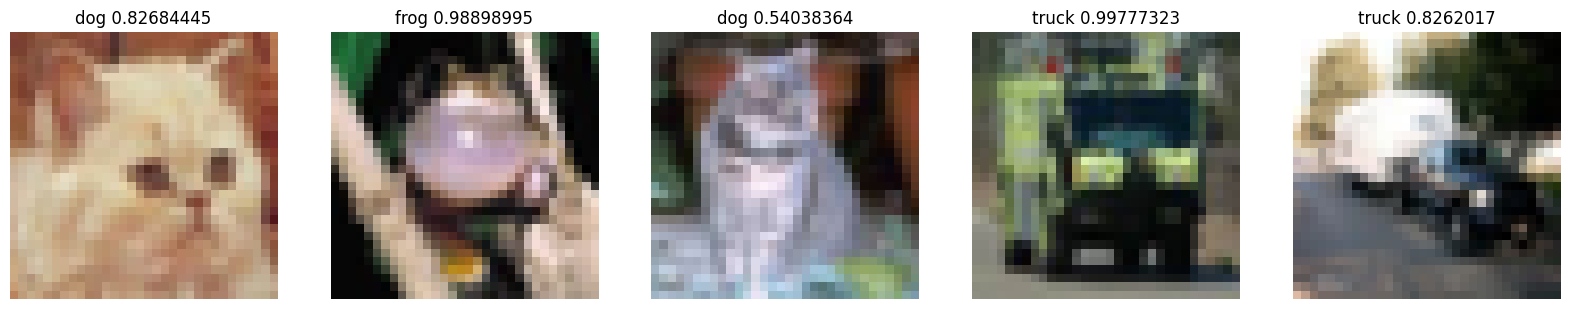

In [82]:
import matplotlib.pyplot as plt
import random

images = x_test[random.sample(range(0, len(x_test)), 5)]
# predict the class of each image
predictions = model.predict(images)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# show the images
fig = plt.figure(figsize=(20, 20))
for i in range(len(images)):
    fig.add_subplot(1, 5, (i+1)*1)
    plt.imshow(images[i])
    plt.axis('off')
    best = max(predictions[i])
    class_name = classes[list(predictions[i]).index(best)]
    plt.title(class_name+ " "+ str(best))